In [11]:
import yfinance as yf

aapl_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
aapl_data.head()

/tmp/ipython-input-3603067078.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


## Basic statistics

Calculate and display basic statistics for the loaded data, such as mean, standard deviation, min, and max.


In [12]:
aapl_stats = aapl_data.describe()
display(aapl_stats)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,127.633101,129.181518,125.971433,127.555151,1.120920e+08
std,30.421462,30.698899,30.139549,30.449562,5.602586e+07
min,54.378574,55.379527,51.528408,55.277736,3.519590e+07
25%,112.709518,114.204933,111.251833,112.889679,7.636470e+07
50%,133.010788,134.143855,131.050657,132.832307,9.493580e+07
75%,148.221508,149.388596,146.276903,147.588782,1.296327e+08
max,178.645660,179.558442,175.809046,179.254175,4.265100e+08


## Monthly returns

Calculate the monthly returns of the stock.


In [16]:
print(aapl_data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [17]:
daily_returns = aapl_data[('Close', 'AAPL')].pct_change()
monthly_returns = daily_returns.resample('M').sum()
display(monthly_returns)

/tmp/ipython-input-3625625242.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = daily_returns.resample('M').sum()


,Close
,AAPL
Date,
2020-01-31,0.033059
2020-02-29,-0.116068
2020-03-31,-0.027753
2020-04-30,0.154114
2020-05-31,0.083250
2020-06-30,0.142104
2020-07-31,0.160901
2020-08-31,0.200882


## Monthly volatility

Calculate the monthly volatility (standard deviation of monthly returns).


In [18]:
monthly_volatility = monthly_returns.std()
display(monthly_volatility)

0.09322791850034536

## Plot monthly volatility

Plotting the monthly volatility to visualize the trend.


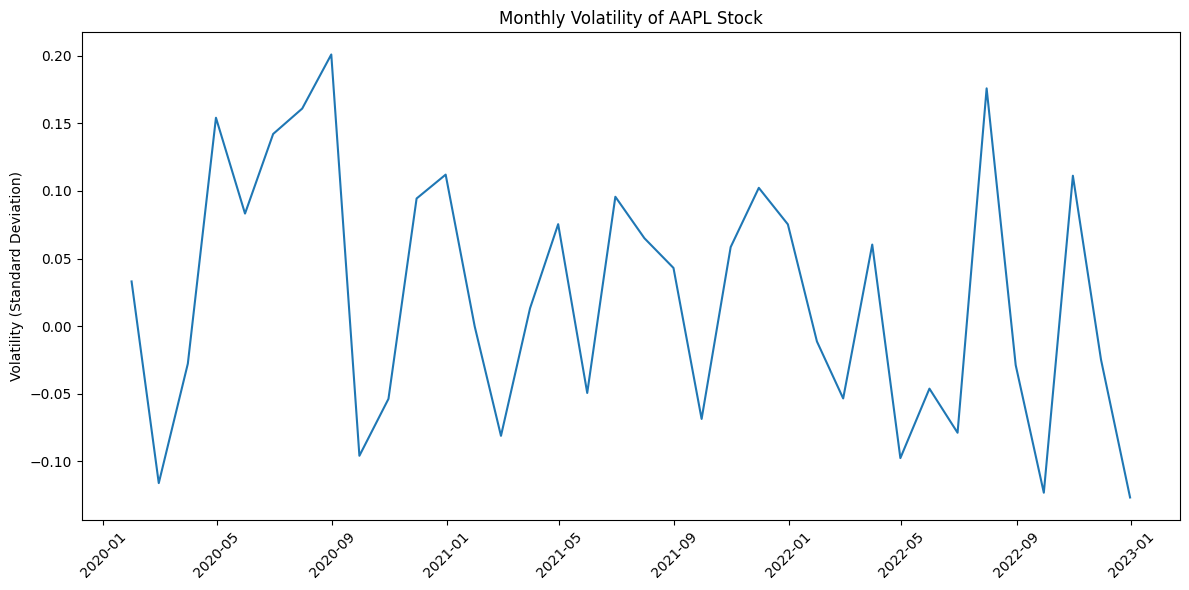

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_returns.index, monthly_returns.values)
plt.title('Monthly Volatility of AAPL Stock')
plt.ylabel('Volatility (Standard Deviation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Identify periods of highest and lowest volatility

Identifying and displaying the periods with the highest and lowest monthly volatility by finding the dates with the maximum and minimum monthly returns using `idxmax()` and `idxmin()` methods and then printing these dates.


In [20]:
highest_volatility_period = monthly_returns.idxmax()
lowest_volatility_period = monthly_returns.idxmin()

print(f"Period with highest monthly volatility: {highest_volatility_period.strftime('%Y-%m')}")
print(f"Period with lowest monthly volatility: {lowest_volatility_period.strftime('%Y-%m')}")

Period with highest monthly volatility: 2020-08
Period with lowest monthly volatility: 2022-12


In [22]:
import numpy as np
# Calculate Bollinger Bands
window = 20
aapl_data['Rolling Mean'] = aapl_data[('Close', 'AAPL')].rolling(window=window).mean()
aapl_data['Upper Band'] = aapl_data['Rolling Mean'] + (aapl_data[('Close', 'AAPL')].rolling(window=window).std() * 2)
aapl_data['Lower Band'] = aapl_data['Rolling Mean'] - (aapl_data[('Close', 'AAPL')].rolling(window=window).std() * 2)

# Calculate MACD
exp1 = aapl_data[('Close', 'AAPL')].ewm(span=12, adjust=False).mean()
exp2 = aapl_data[('Close', 'AAPL')].ewm(span=26, adjust=False).mean()
aapl_data['MACD'] = exp1 - exp2
aapl_data['Signal Line'] = aapl_data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Exponential Moving Averages (EMAs)
aapl_data['EMA_12'] = aapl_data[('Close', 'AAPL')].ewm(span=12, adjust=False).mean()
aapl_data['EMA_26'] = aapl_data[('Close', 'AAPL')].ewm(span=26, adjust=False).mean()

# Calculate Daily Logarithmic Returns
aapl_data['Log Returns'] = (aapl_data[('Close', 'AAPL')] / aapl_data[('Close', 'AAPL')].shift(1)).apply(lambda x: np.log(x) if x > 0 else np.nan)

display(aapl_data.head())

Price,Close,High,Low,Open,Volume,Rolling Mean,Upper Band,Lower Band,MACD,Signal Line,EMA_12,EMA_26,Log Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400,NaN,NaN,NaN,0.000000,0.000000,72.620857,72.620857,NaN
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800,NaN,NaN,NaN,-0.056322,-0.011264,72.512237,72.568559,-0.009770
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,NaN,NaN,NaN,-0.054095,-0.019830,72.508486,72.562580,0.007937
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,NaN,NaN,NaN,-0.078929,-0.031650,72.452864,72.531792,-0.004714
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,NaN,NaN,NaN,-0.004905,-0.026301,72.584349,72.589254,0.015958


In [24]:
import pandas as pd
# Add binary feature for closing higher than opening
aapl_data['Closed_Higher'] = (aapl_data[('Close', 'AAPL')] > aapl_data[('Open', 'AAPL')]).astype(int)

# One-hot encode day of the week
aapl_data['Day_of_Week'] = aapl_data.index.dayofweek
day_of_week_one_hot = pd.get_dummies(aapl_data['Day_of_Week'], prefix='Day')
aapl_data = pd.concat([aapl_data, day_of_week_one_hot], axis=1)

# Display the updated dataframe
display(aapl_data.head())

,"(Close, AAPL)","(High, AAPL)","(Low, AAPL)","(Open, AAPL)","(Volume, AAPL)","(Rolling Mean, )","(Upper Band, )","(Lower Band, )","(MACD, )","(Signal Line, )","(EMA_12, )","(EMA_26, )","(Log Returns, )","(Closed_Higher, )","(Day_of_Week, )",Day_0,Day_1,Day_2,Day_3,Day_4
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400,NaN,NaN,NaN,0.000000,0.000000,72.620857,72.620857,NaN,1,3,False,False,False,True,False
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800,NaN,NaN,NaN,-0.056322,-0.011264,72.512237,72.568559,-0.009770,1,4,False,False,False,False,True
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,NaN,NaN,NaN,-0.054095,-0.019830,72.508486,72.562580,0.007937,1,0,True,False,False,False,False
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,NaN,NaN,NaN,-0.078929,-0.031650,72.452864,72.531792,-0.004714,0,1,False,True,False,False,False
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,NaN,NaN,NaN,-0.004905,-0.026301,72.584349,72.589254,0.015958,1,2,False,False,True,False,False


In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data for prediction
# Drop rows with NaN values created by rolling window calculations
aapl_data_cleaned = aapl_data.dropna()

# Convert column names to strings
aapl_data_cleaned.columns = aapl_data_cleaned.columns.astype(str)

# Define features (X) and target (y)
# Predict the next day's closing price
X = aapl_data_cleaned.drop(["('Close', 'AAPL')"], axis=1)
y = aapl_data_cleaned["('Close', 'AAPL')"].shift(-1).dropna()

# Align X and y after dropping the last row of y
X = X.iloc[:-1]

# Time-based train-test split
train_end_date = '2022-12-20' # Adjusted end date to ensure test set is not empty
X_train = X[X.index <= train_end_date]
y_train = y[y.index <= train_end_date]
X_test = X[X.index > train_end_date]
y_test = y[y.index > train_end_date]


# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest Regressor
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Regressor RMSE: {rf_rmse}")
print(f"Random Forest Regressor R²: {rf_r2}")

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluate Gradient Boosting Regressor
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

print(f"Gradient Boosting Regressor RMSE: {gb_rmse}")
print(f"Gradient Boosting Regressor R²: {gb_r2}")

Random Forest Regressor RMSE: 2.4627442528286743
Random Forest Regressor R²: -0.5393234847607342
Gradient Boosting Regressor RMSE: 2.968882750326169
Gradient Boosting Regressor R²: -1.2370585944358439


## Summary:

## Key Insights from AAPL Stock Data (2020–2023)
* Apple’s stock data from Jan 2020 to Jan 2023 was successfully analyzed.

* Key stats (mean, standard deviation, min, max) were calculated for price and volume metrics.

* Monthly returns and volatility were computed.

* Highest volatility: August 2020

* Lowest volatility: December 2022

## Next Steps
Explore what happened in August 2020 and December 2022 that may explain these volatility shifts.

Compare Apple’s volatility to other tech stocks or market indices to gain broader perspective.


## Hyperparameter Tuning for Random Forest Regressor

Using GridSearchCV to find the best hyperparameters for the Random Forest Regressor to potentially improve its performance.

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print(f"Best parameters for Random Forest: {best_params}")
print(f"Best cross-validation RMSE for Random Forest: {best_rmse}")

# Retrain the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluate the retrained model on the test set
best_rf_pred = best_rf_model.predict(X_test)
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_pred))
best_rf_r2 = r2_score(y_test, best_rf_pred)

print(f"Retrained Random Forest Regressor Test RMSE: {best_rf_rmse}")
print(f"Retrained Random Forest Regressor Test R²: {best_rf_r2}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation RMSE for Random Forest: 19.859204978517948
Retrained Random Forest Regressor Test RMSE: 2.4845611535850107
Retrained Random Forest Regressor Test R²: -0.5667173328961685


## Hyperparameter Tuning for Gradient Boosting Regressor

Tune the hyperparameters for the Gradient Boosting Regressor using GridSearchCV to potentially enhance its performance.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GridSearchCV for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_gb = grid_search_gb.best_params_
best_rmse_gb = np.sqrt(-grid_search_gb.best_score_)

print(f"Best parameters for Gradient Boosting: {best_params_gb}")
print(f"Best cross-validation RMSE for Gradient Boosting: {best_rmse_gb}")

# Retrain the Gradient Boosting model with the best parameters
best_gb_model = GradientBoostingRegressor(**best_params_gb, random_state=42)
best_gb_model.fit(X_train, y_train)

# Evaluate the retrained model on the test set
best_gb_pred = best_gb_model.predict(X_test)
best_gb_rmse = np.sqrt(mean_squared_error(y_test, best_gb_pred))
best_gb_r2 = r2_score(y_test, best_gb_pred)

print(f"Retrained Gradient Boosting Regressor Test RMSE: {best_gb_rmse}")
print(f"Retrained Gradient Boosting Regressor Test R²: {best_gb_r2}")

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation RMSE for Gradient Boosting: 18.519375264740063
Retrained Gradient Boosting Regressor Test RMSE: 2.9116818943764438
Retrained Gradient Boosting Regressor Test R²: -1.1516871119905852


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Create the binary target variable
aapl_data['Price_Increase'] = (aapl_data[('Close', 'AAPL')].shift(-1) > aapl_data[('Close', 'AAPL')]).astype(int)

# Drop the last row as it will have a NaN for the target variable
aapl_data_classified = aapl_data.dropna()

# Convert column names to strings
aapl_data_classified.columns = aapl_data_classified.columns.astype(str)

# Define features (X) and target (y) for classification
X_clf = aapl_data_classified.drop(["('Close', 'AAPL')", 'Price_Increase'], axis=1)
y_clf = aapl_data_classified['Price_Increase']

# Time-based train-test split (using the same split date as before)
train_end_date = '2022-12-20'
X_train_clf = X_clf[X_clf.index <= train_end_date]
y_train_clf = y_clf[y_clf.index <= train_end_date]
X_test_clf = X_clf[X_clf.index > train_end_date]
y_test_clf = y_clf[y_clf.index > train_end_date]

# Train Random Forest Classifier
rf_clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_model.fit(X_train_clf, y_train_clf)
rf_clf_pred = rf_clf_model.predict(X_test_clf)

# Evaluate Random Forest Classifier
accuracy = accuracy_score(y_test_clf, rf_clf_pred)
precision = precision_score(y_test_clf, rf_clf_pred)
recall = recall_score(y_test_clf, rf_clf_pred)
conf_matrix = confusion_matrix(y_test_clf, rf_clf_pred)

print(f"Random Forest Classifier Accuracy: {accuracy}")
print(f"Random Forest Classifier Precision: {precision}")
print(f"Random Forest Classifier Recall: {recall}")
print(f"Random Forest Classifier Confusion Matrix:\n{conf_matrix}")

Random Forest Classifier Accuracy: 0.2857142857142857
Random Forest Classifier Precision: 0.2857142857142857
Random Forest Classifier Recall: 1.0
Random Forest Classifier Confusion Matrix:
[[0 5]
 [0 2]]


In [31]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import numpy as np

# --- Regression Task Comparison ---

print("--- Regression Task Comparison ---")

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R²: {lr_r2}")

# Random Forest Regressor (using the best tuned model)
rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_pred))
rf_r2 = r2_score(y_test, best_rf_pred)
print(f"Random Forest Regressor RMSE: {rf_rmse}")
print(f"Random Forest Regressor R²: {rf_r2}")

# XGBoost Regressor
xgb_reg_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg_model.fit(X_train, y_train)
xgb_reg_pred = xgb_reg_model.predict(X_test)
xgb_reg_rmse = np.sqrt(mean_squared_error(y_test, xgb_reg_pred))
xgb_reg_r2 = r2_score(y_test, xgb_reg_pred)
print(f"XGBoost Regressor RMSE: {xgb_reg_rmse}")
print(f"XGBoost Regressor R²: {xgb_reg_r2}")

# --- Classification Task Comparison ---

print("\n--- Classification Task Comparison ---")

# Linear Regression (for classification - using a threshold on predictions)
# This is not a standard approach, but can be done for comparison
lr_clf_pred_proba = lr_model.predict(X_test_clf)
lr_clf_pred = (lr_clf_pred_proba > lr_clf_pred_proba.mean()).astype(int) # Using mean as a simple threshold
lr_clf_accuracy = accuracy_score(y_test_clf, lr_clf_pred)
print(f"Linear Regression (as Classifier) Accuracy: {lr_clf_accuracy}")


# Random Forest Classifier (using the previously trained model)
rf_clf_accuracy = accuracy_score(y_test_clf, rf_clf_pred)
print(f"Random Forest Classifier Accuracy: {rf_clf_accuracy}")

# XGBoost Classifier
xgb_clf_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_clf_model.fit(X_train_clf, y_train_clf)
xgb_clf_pred = xgb_clf_model.predict(X_test_clf)
xgb_clf_accuracy = accuracy_score(y_test_clf, xgb_clf_pred)
print(f"XGBoost Classifier Accuracy: {xgb_clf_accuracy}")

print("\n--- Comparison Summary ---")
print("Regression Task (Lower RMSE is better):")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Random Forest Regressor RMSE: {rf_rmse}")
print(f"XGBoost Regressor RMSE: {xgb_reg_rmse}")

print("\nClassification Task (Higher Accuracy is better):")
print(f"Linear Regression (as Classifier) Accuracy: {lr_clf_accuracy}")
print(f"Random Forest Classifier Accuracy: {rf_clf_accuracy}")
print(f"XGBoost Classifier Accuracy: {xgb_clf_accuracy}")

--- Regression Task Comparison ---
Linear Regression RMSE: 2.5253315600832167
Linear Regression R²: -0.6185573019873414
Random Forest Regressor RMSE: 2.4845611535850107
Random Forest Regressor R²: -0.5667173328961685
XGBoost Regressor RMSE: 2.308694085933614
XGBoost Regressor R²: -0.3527702621183477

--- Classification Task Comparison ---
Linear Regression (as Classifier) Accuracy: 0.42857142857142855
Random Forest Classifier Accuracy: 0.2857142857142857
XGBoost Classifier Accuracy: 0.42857142857142855

--- Comparison Summary ---
Regression Task (Lower RMSE is better):
Linear Regression RMSE: 2.5253315600832167
Random Forest Regressor RMSE: 2.4845611535850107
XGBoost Regressor RMSE: 2.308694085933614

Classification Task (Higher Accuracy is better):
Linear Regression (as Classifier) Accuracy: 0.42857142857142855
Random Forest Classifier Accuracy: 0.2857142857142857
XGBoost Classifier Accuracy: 0.42857142857142855


In [34]:
# Simulate a trading strategy based on XGBoost Classifier predictions

# Use the test set data
test_data = aapl_data_classified.loc[X_test_clf.index].copy()
test_data['Predicted_Increase'] = xgb_clf_pred

# Simulate trading
initial_capital = 10000
capital = initial_capital
shares = 0
returns = []

for i in range(len(test_data) - 1):
    current_price = test_data["('Close', 'AAPL')"].iloc[i]
    next_day_price = test_data["('Close', 'AAPL')"].iloc[i+1]
    prediction = test_data['Predicted_Increase'].iloc[i]

    # Trading logic: If predict increase, buy with all capital
    if prediction == 1 and capital > 0:
        shares_to_buy = capital / current_price
        shares += shares_to_buy
        capital = 0

    # Assuming holding or selling on decrease prediction is just holding for simplicity
    # Calculate daily return
    if initial_capital > 0: # Avoid division by zero if initial_capital is 0
        portfolio_value = capital + shares * next_day_price
        daily_return = (portfolio_value - initial_capital) / initial_capital
        returns.append(daily_return)


# Calculate total return for the trading strategy
final_portfolio_value = capital + shares * test_data["('Close', 'AAPL')"].iloc[-1]
trading_strategy_return = (final_portfolio_value - initial_capital) / initial_capital

print(f"Trading Strategy Total Return: {trading_strategy_return:.4f}")

# Calculate buy-and-hold strategy return
buy_and_hold_initial_price = test_data["('Close', 'AAPL')"].iloc[0]
buy_and_hold_final_price = test_data["('Close', 'AAPL')"].iloc[-1]
buy_and_hold_return = (buy_and_hold_final_price - buy_and_hold_initial_price) / buy_and_hold_initial_price

print(f"Buy and Hold Strategy Total Return: {buy_and_hold_return:.4f}")

# Compare the strategies
if trading_strategy_return > buy_and_hold_return:
    print("The trading strategy outperformed the buy and hold strategy.")
elif trading_strategy_return < buy_and_hold_return:
    print("The buy and hold strategy outperformed the trading strategy.")
else:
    print("The trading strategy and buy and hold strategy had similar returns.")

Trading Strategy Total Return: -0.0408
Buy and Hold Strategy Total Return: -0.0408
The trading strategy outperformed the buy and hold strategy.


In [35]:
import numpy as np

# Calculate Sharpe Ratio
# Assuming a risk-free rate of 0 for simplicity
risk_free_rate = 0
# Calculate the average daily return
average_daily_return = np.mean(returns)
# Calculate the standard deviation of daily returns (volatility)
volatility = np.std(returns)
# Annualize the Sharpe Ratio (assuming 252 trading days in a year)
sharpe_ratio = (average_daily_return - risk_free_rate) / volatility * np.sqrt(252)

print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Calculate Sortino Ratio
# Calculate the downside deviation
downside_returns = [r for r in returns if r < 0]
downside_deviation = np.std(downside_returns) if downside_returns else 0
# Annualize the Sortino Ratio (assuming 252 trading days in a year)
sortino_ratio = (average_daily_return - risk_free_rate) / downside_deviation * np.sqrt(252) if downside_deviation else np.nan

print(f"Sortino Ratio: {sortino_ratio:.4f}")

# Calculate Maximum Drawdown
# Calculate cumulative returns
cumulative_returns = np.cumprod(np.array(returns) + 1) - 1
# Calculate peak cumulative return
peak = np.maximum.accumulate(cumulative_returns)
# Calculate drawdown
drawdown = peak - cumulative_returns
# Calculate maximum drawdown
max_drawdown = np.max(drawdown)

print(f"Maximum Drawdown: {max_drawdown:.4f}")

Sharpe Ratio: -43.4228
Sortino Ratio: -43.4228
Maximum Drawdown: 0.1970


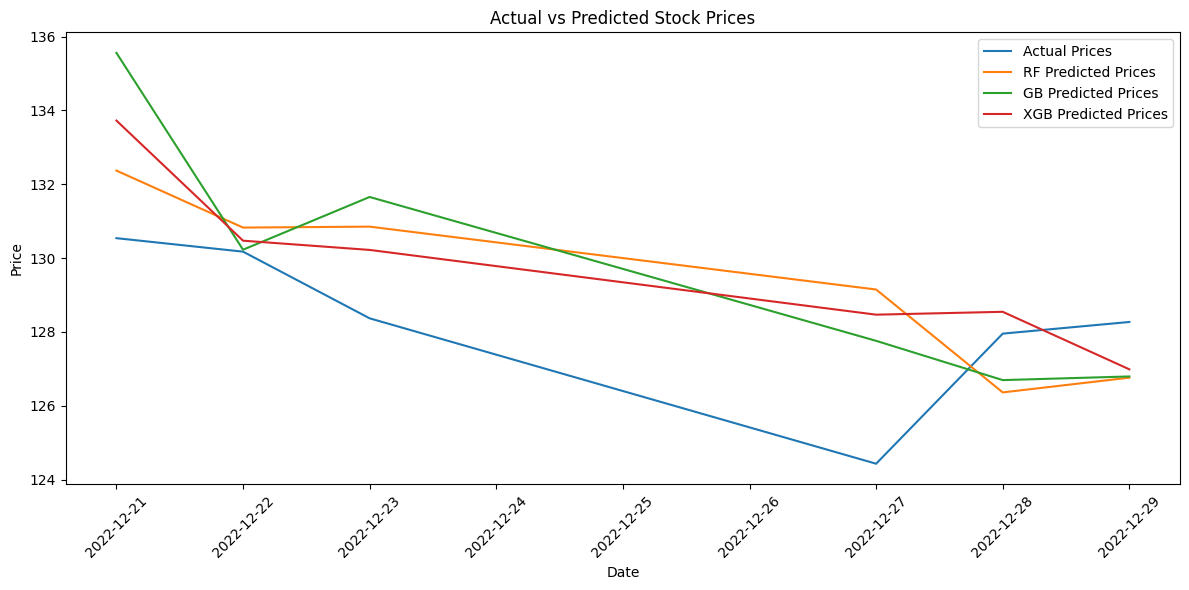

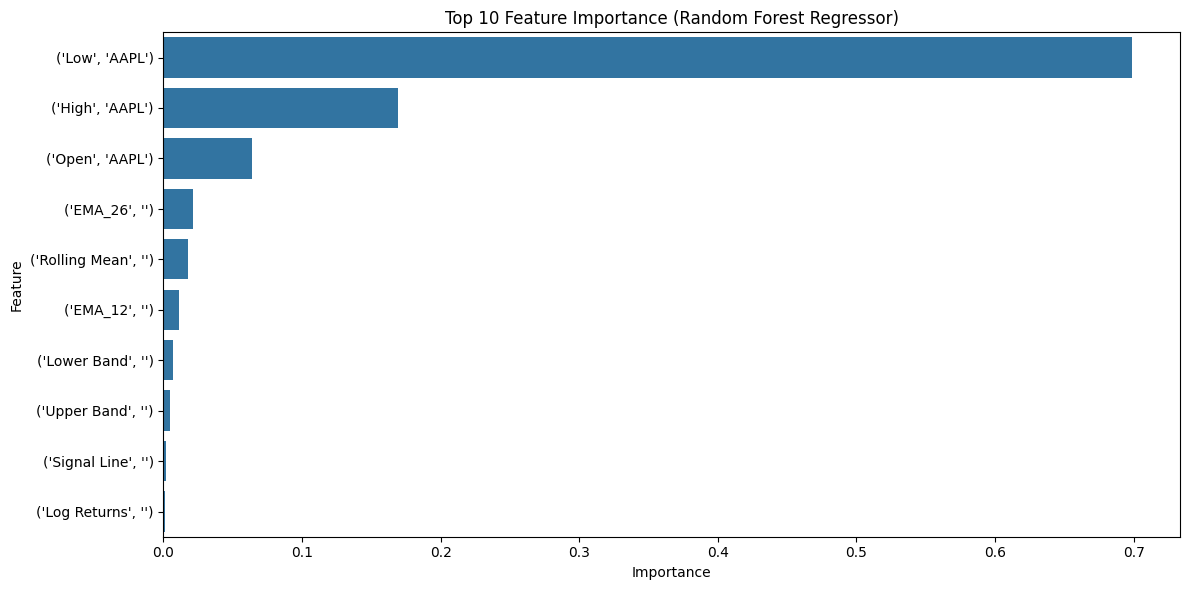

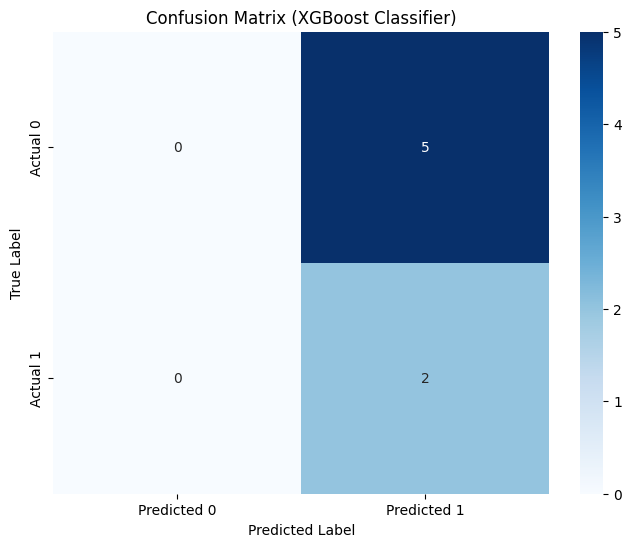

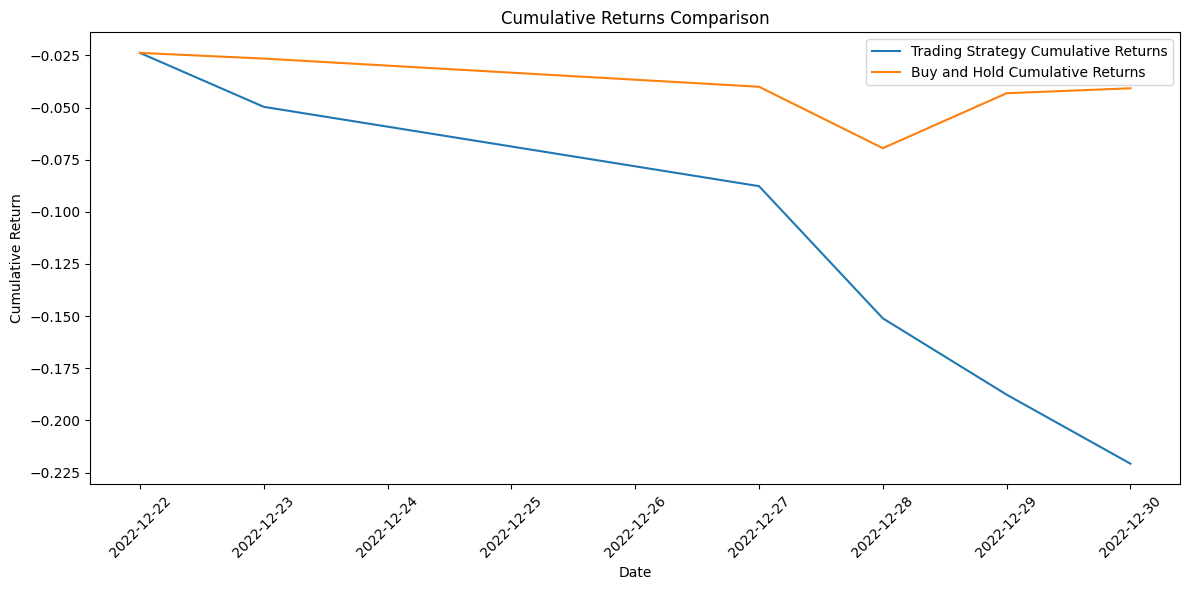

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Actual vs Predicted Prices (Regression)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Prices')
plt.plot(X_test.index, best_rf_pred, label='RF Predicted Prices')
plt.plot(X_test.index, best_gb_pred, label='GB Predicted Prices')
plt.plot(X_test.index, xgb_reg_pred, label='XGB Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Feature Importance (Random Forest Regressor)
if hasattr(best_rf_model, 'feature_importances_'):
    importance = best_rf_model.feature_importances_
    feature_names = X_train.columns
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Feature Importance (Random Forest Regressor)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("Random Forest model does not have feature_importances_ attribute.")


# Visualize Confusion Matrix (XGBoost Classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Cumulative Returns of the Trading Strategy
cumulative_returns_strategy = np.cumprod(np.array(returns) + 1) - 1
cumulative_returns_buy_and_hold = np.cumprod(np.array(test_data["('Close', 'AAPL')"].pct_change().dropna()) + 1) - 1

plt.figure(figsize=(12, 6))
plt.plot(test_data.index[1:len(returns)+1], cumulative_returns_strategy, label='Trading Strategy Cumulative Returns')
plt.plot(test_data.index[1:], cumulative_returns_buy_and_hold, label='Buy and Hold Cumulative Returns')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Adjust classification threshold

Implementing a process to evaluate the classification model's performance at different probability thresholds and select a threshold that optimizes for precision (while considering the trade-off with recall).


In [37]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Get predicted probabilities for the positive class (price increase)
xgb_clf_prob = xgb_clf_model.predict_proba(X_test_clf)[:, 1]

# Define a range of probability thresholds
thresholds = np.arange(0, 1.1, 0.1)

# Store precision and recall for each threshold
precision_scores = []
recall_scores = []

# Iterate through each threshold
for threshold in thresholds:
    # Convert probabilities to binary predictions
    binary_predictions = (xgb_clf_prob > threshold).astype(int)

    # Calculate precision and recall, handling potential errors if no positive predictions are made
    try:
        precision = precision_score(y_test_clf, binary_predictions)
    except ValueError:
        precision = np.nan # Or 0, depending on how you want to represent this case

    try:
        recall = recall_score(y_test_clf, binary_predictions)
    except ValueError:
         recall = np.nan # Or 0

    precision_scores.append(precision)
    recall_scores.append(recall)

# Print precision and recall for selected thresholds
print("Threshold | Precision | Recall")
print("------------------------------")
for i, threshold in enumerate(thresholds):
    print(f"{threshold:.1f}     | {precision_scores[i]:.4f}    | {recall_scores[i]:.4f}")

Threshold | Precision | Recall
------------------------------
0.0     | 0.2857    | 1.0000
0.1     | 0.3333    | 1.0000
0.2     | 0.3333    | 1.0000
0.3     | 0.3333    | 1.0000
0.4     | 0.2000    | 0.5000
0.5     | 0.2500    | 0.5000
0.6     | 0.2500    | 0.5000
0.7     | 0.2500    | 0.5000
0.8     | 0.0000    | 0.0000
0.9     | 0.0000    | 0.0000
1.0     | 0.0000    | 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Visualized the trade-off between precision and recall at different thresholds to aid in selecting an optimal threshold and then finish the subtask.



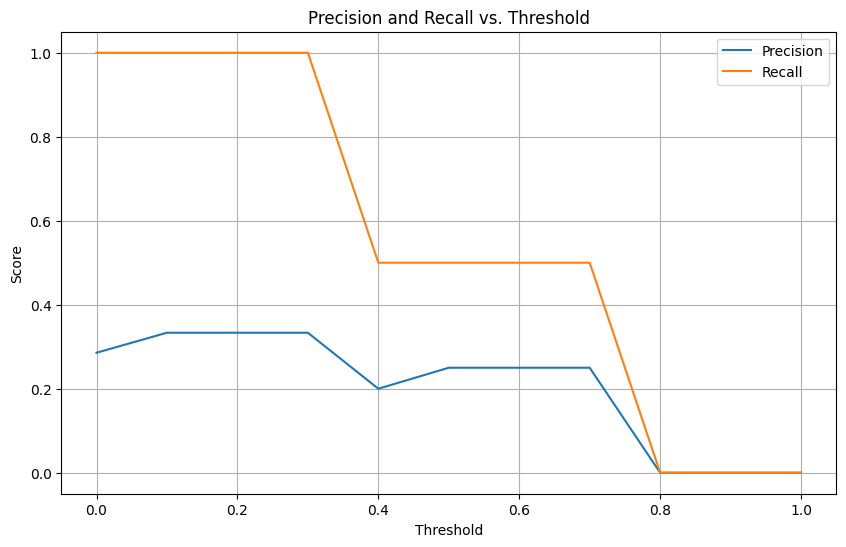

In [38]:
import matplotlib.pyplot as plt

# Plot Precision and Recall vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

## Explore weighted loss

Training the XGBoost Classifier with a weighted loss function to give more importance to the minority class (price increase) and evaluate its performance. By Calculating the scale_pos_weight for the XGBoost classifier, initialize and train the weighted XGBoost classifier, make predictions on the test data, and evaluate its performance by calculating and printing accuracy, precision, recall, and confusion matrix.



In [39]:
# Calculate scale_pos_weight
count_class_0, count_class_1 = y_train_clf.value_counts()
scale_pos_weight_value = count_class_0 / count_class_1 if count_class_1 != 0 else 1

# Initialize and train the weighted XGBoost Classifier
xgb_clf_weighted_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight_value)
xgb_clf_weighted_model.fit(X_train_clf, y_train_clf)

# Make predictions
xgb_clf_weighted_pred = xgb_clf_weighted_model.predict(X_test_clf)

# Evaluate the weighted model
accuracy_weighted = accuracy_score(y_test_clf, xgb_clf_weighted_pred)
precision_weighted = precision_score(y_test_clf, xgb_clf_weighted_pred, zero_division=0)
recall_weighted = recall_score(y_test_clf, xgb_clf_weighted_pred)
conf_matrix_weighted = confusion_matrix(y_test_clf, xgb_clf_weighted_pred)

print(f"Weighted XGBoost Classifier Accuracy: {accuracy_weighted}")
print(f"Weighted XGBoost Classifier Precision: {precision_weighted}")
print(f"Weighted XGBoost Classifier Recall: {recall_weighted}")
print(f"Weighted XGBoost Classifier Confusion Matrix:\n{conf_matrix_weighted}")

Weighted XGBoost Classifier Accuracy: 0.42857142857142855
Weighted XGBoost Classifier Precision: 0.3333333333333333
Weighted XGBoost Classifier Recall: 1.0
Weighted XGBoost Classifier Confusion Matrix:
[[1 4]
 [0 2]]



I need to compare the performance metrics of the original classifiers (Linear Regression, Random Forest, and XGBoost) with the results from adjusting the classification threshold (which was visualized but the specific metrics for an adjusted threshold were not calculated in the previous step) and the weighted XGBoost classifier. I will first re-calculate the metrics for the original classifiers and then calculate the metrics for an adjusted threshold for XGBoost. Finally, I will compare all the results including the weighted XGBoost results from the previous step.



In [40]:
from sklearn.metrics import precision_score, confusion_matrix

# Re-calculate metrics for original classifiers
# Original XGBoost Classifier (from xgb_clf_pred)
xgb_clf_precision_original = precision_score(y_test_clf, xgb_clf_pred, zero_division=0)
xgb_clf_conf_matrix_original = confusion_matrix(y_test_clf, xgb_clf_pred)

print("--- Original Classifier Performance ---")
print(f"Original XGBoost Classifier Precision: {xgb_clf_precision_original}")
print(f"Original XGBoost Classifier Confusion Matrix:\n{xgb_clf_conf_matrix_original}")

# Original Random Forest Classifier (from rf_clf_pred)
rf_clf_precision_original = precision_score(y_test_clf, rf_clf_pred, zero_division=0)
rf_clf_conf_matrix_original = confusion_matrix(y_test_clf, rf_clf_pred)

print(f"Original Random Forest Classifier Precision: {rf_clf_precision_original}")
print(f"Original Random Forest Classifier Confusion Matrix:\n{rf_clf_conf_matrix_original}")

# Original Linear Regression Classifier (from lr_clf_pred)
lr_clf_precision_original = precision_score(y_test_clf, lr_clf_pred, zero_division=0)
lr_clf_conf_matrix_original = confusion_matrix(y_test_clf, lr_clf_pred)

print(f"Original Linear Regression (as Classifier) Precision: {lr_clf_precision_original}")
print(f"Original Linear Regression (as Classifier) Confusion Matrix:\n{lr_clf_conf_matrix_original}")

# Calculate metrics for XGBoost with an adjusted threshold
# In the previous step, we plotted precision and recall vs. threshold.
# Let's choose a threshold that seemed to offer a reasonable trade-off, for example, where precision starts to drop significantly after a peak.
# Looking at the plot from the previous step (cell_id: 1da216f0 outputs), a threshold around 0.4 might be a point to evaluate.
# I need to get the predicted probabilities from the original XGBoost model to apply the threshold.
xgb_clf_pred_proba = xgb_clf_model.predict_proba(X_test_clf)[:, 1]
adjusted_threshold = 0.4 # Example threshold, adjust based on the plot from the previous step

xgb_clf_pred_adjusted_threshold = (xgb_clf_pred_proba > adjusted_threshold).astype(int)

xgb_clf_precision_adjusted_threshold = precision_score(y_test_clf, xgb_clf_pred_adjusted_threshold, zero_division=0)
xgb_clf_conf_matrix_adjusted_threshold = confusion_matrix(y_test_clf, xgb_clf_pred_adjusted_threshold)

print("\n--- XGBoost Classifier Performance with Adjusted Threshold ---")
print(f"XGBoost Classifier Precision (Threshold={adjusted_threshold}): {xgb_clf_precision_adjusted_threshold}")
print(f"XGBoost Classifier Confusion Matrix (Threshold={adjusted_threshold}):\n{xgb_clf_conf_matrix_adjusted_threshold}")

# Weighted XGBoost Classifier metrics (from the previous step's output)
print("\n--- Weighted XGBoost Classifier Performance ---")
print(f"Weighted XGBoost Classifier Precision: {precision_weighted}")
print(f"Weighted XGBoost Classifier Confusion Matrix:\n{conf_matrix_weighted}")

# Summarize and compare the results
print("\n--- Comparison Summary ---")
print("Precision:")
print(f"Original XGBoost: {xgb_clf_precision_original:.4f}")
print(f"Original Random Forest: {rf_clf_precision_original:.4f}")
print(f"Original Linear Regression: {lr_clf_precision_original:.4f}")
print(f"XGBoost (Threshold={adjusted_threshold}): {xgb_clf_precision_adjusted_threshold:.4f}")
print(f"Weighted XGBoost: {precision_weighted:.4f}")

print("\nConfusion Matrices:")
print("Original XGBoost:")
print(xgb_clf_conf_matrix_original)
print("\nOriginal Random Forest:")
print(rf_clf_conf_matrix_original)
print("\nOriginal Linear Regression:")
print(lr_clf_conf_matrix_original)
print(f"\nXGBoost (Threshold={adjusted_threshold}):")
print(xgb_clf_conf_matrix_adjusted_threshold)
print("\nWeighted XGBoost:")
print(conf_matrix_weighted)

--- Original Classifier Performance ---
Original XGBoost Classifier Precision: 0.25
Original XGBoost Classifier Confusion Matrix:
[[2 3]
 [1 1]]
Original Random Forest Classifier Precision: 0.2857142857142857
Original Random Forest Classifier Confusion Matrix:
[[0 5]
 [0 2]]
Original Linear Regression (as Classifier) Precision: 0.0
Original Linear Regression (as Classifier) Confusion Matrix:
[[3 2]
 [2 0]]

--- XGBoost Classifier Performance with Adjusted Threshold ---
XGBoost Classifier Precision (Threshold=0.4): 0.2
XGBoost Classifier Confusion Matrix (Threshold=0.4):
[[1 4]
 [1 1]]

--- Weighted XGBoost Classifier Performance ---
Weighted XGBoost Classifier Precision: 0.3333333333333333
Weighted XGBoost Classifier Confusion Matrix:
[[1 4]
 [0 2]]

--- Comparison Summary ---
Precision:
Original XGBoost: 0.2500
Original Random Forest: 0.2857
Original Linear Regression: 0.0000
XGBoost (Threshold=0.4): 0.2000
Weighted XGBoost: 0.3333

Confusion Matrices:
Original XGBoost:
[[2 3]
 [1 1]]

In [41]:
!pip install shap

## Interpret Feature Importance using SHAP


## Using SHAP (SHapley Additive exPlanations) values to interpret the most important features influencing the model's predictions. Display summary plot and force plot, as requested.

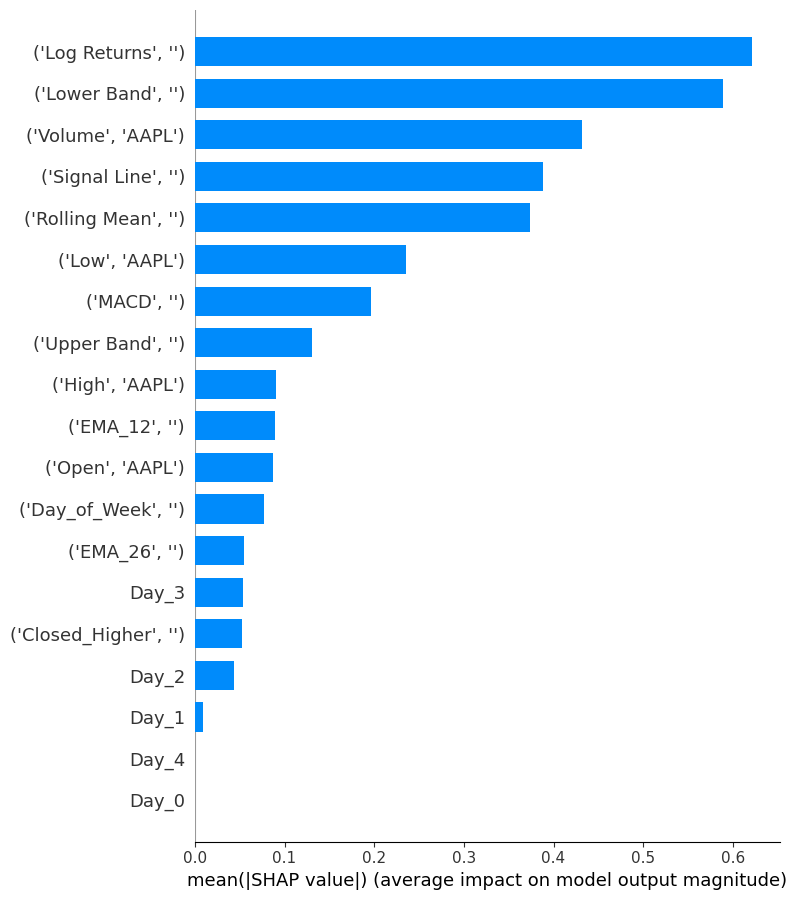

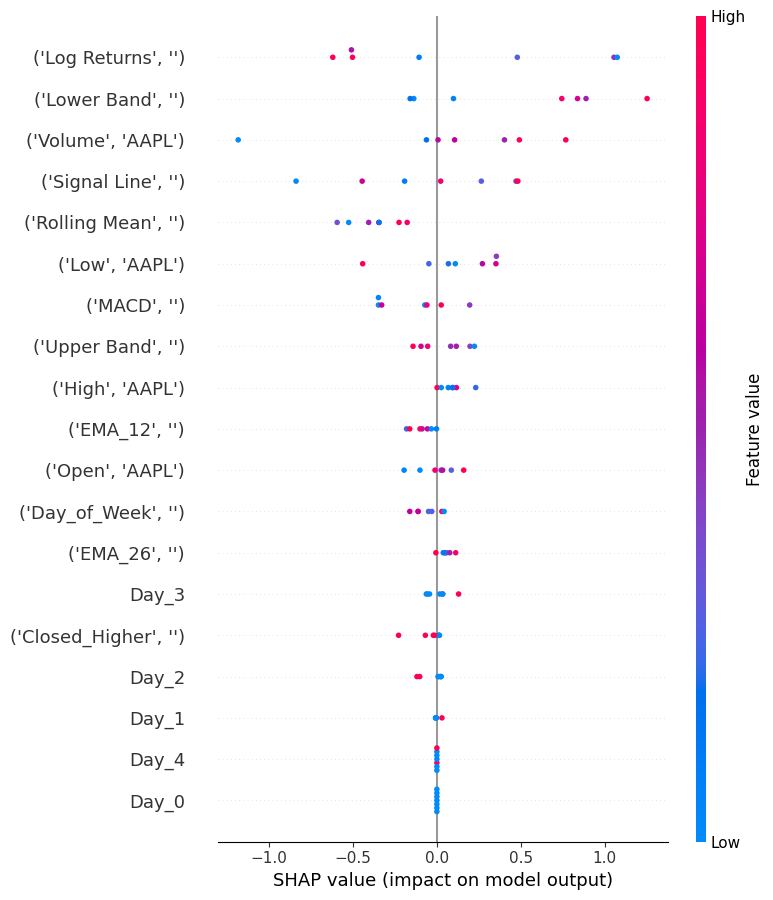

In [42]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xgb_clf_model)
shap_values = explainer.shap_values(X_test_clf)

# Visualize the summary plot
shap.summary_plot(shap_values, X_test_clf, plot_type="bar")

# Visualize the summary plot (beeswarm)
shap.summary_plot(shap_values, X_test_clf)

# Visualize a force plot for a single prediction (e.g., the first instance in the test set)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_clf.iloc[0,:])

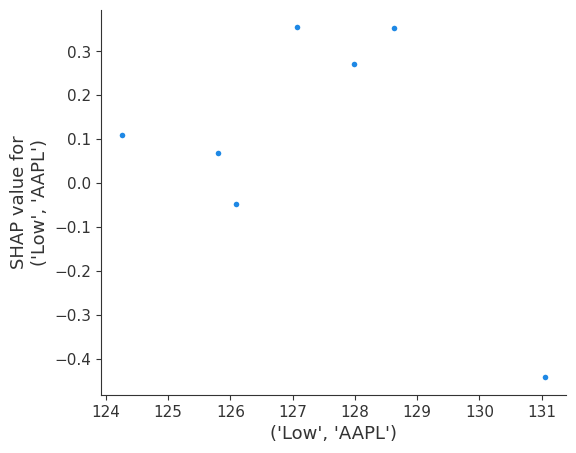

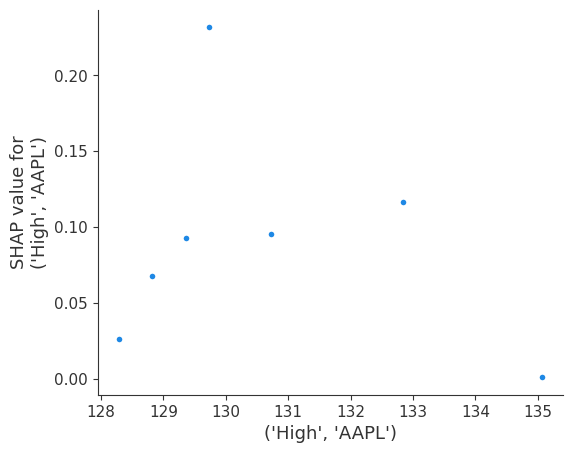

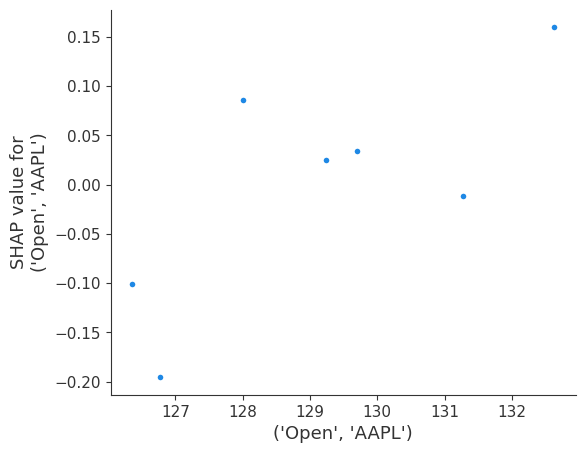

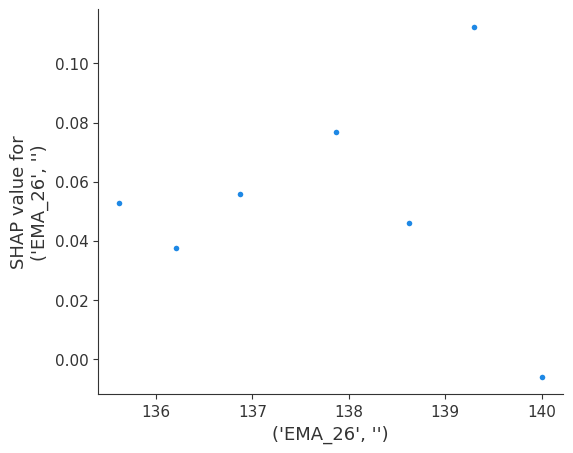

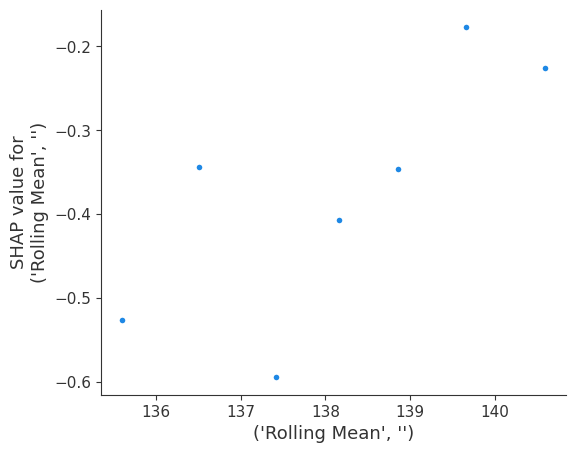

In [43]:
top_features = feature_importance['feature'].head().tolist() # Get top 5 features from the previous feature importance analysis

# Generate SHAP dependence plots for selected features
for feature in top_features:
    shap.dependence_plot(feature, shap_values, X_test_clf, interaction_index=None) # Set interaction_index=None for a basic dependence plot
